# Tarea 6 iPython
## Semana 8
## SEC-03

La solución debe subirse a SicuaPlus en un único archivo con el nombre $\verb|NombreApellido_hw6.ipynb|$ antes de que termine la clase. Todos los puntos deben resolverse en este **mismo cuaderno**.

En este ejercicio exploraremos con una mayor profundidad el uso de clases para la solución de un problema, además de familiarizarnos con el entorno de programación interactivo en el cuaderno de **iPython**.

Se busca mejorar el proceso de predicción de trayectorias en un laboratorio que realiza experimentos de detección de partículas elementales utilizando cámaras de burbujas. Las cámaras de burbujas consisten en un líquido transparente con una temperatura muy cercana a su punto de ebullición dentro de un solenoide que genera un campo magnético uniforme, por lo tanto cuando una partícula cargada atraviesa el líquido deja un camino de burbujas que resulta en imágenes como la mostrada en el artículo del CERN https://home.cern/about/updates/2015/06/seeing-invisible-event-displays-particle-physics

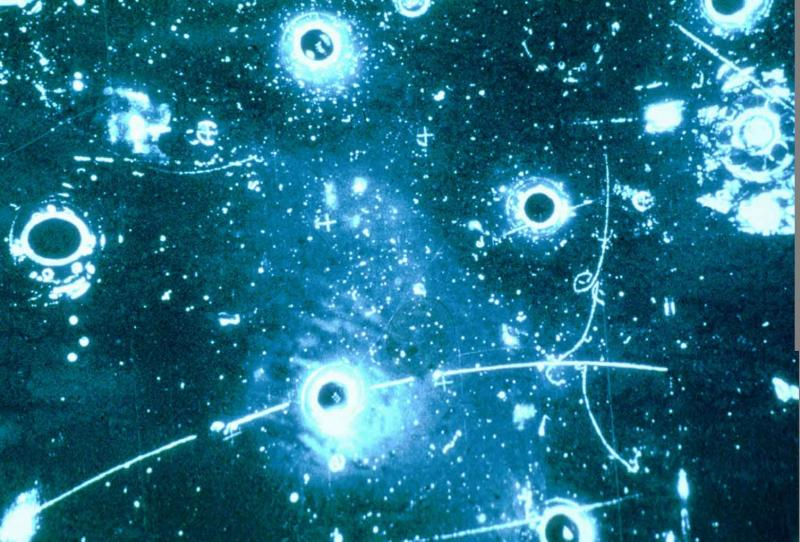


Para mejorar el funcionamiento del laboratorio, usted es encargado de crear la clase **Partícula**. Con la cual se resolverá las ecuaciones de movimiento de la partícula, dadas por la segunda ley de Newton:

$$q\vec{v} \times \vec{B}+ q\vec{E}=m\vec{a} $$

donde el campo eléctrico $\vec{E}$ corresponde a la diferencia de potencial utilizada para acelerar las partículas antes de llegar al detector.

En este ejercicio **únicamente** se tendrá en cuenta el movimiento en el plano $xy$ de la partícula, dado un campo magnético constante $\vec{B}=B_0\hat{z}$ y el campo eléctrico $\vec{E}=E_x\hat{x}+E_y\hat{y}$. 

## Punto 1 (2.5)

Cree la clase **Particula**, la cual debe tener como atributos:

1. Posiciones en x,y
2. Velocidades en x,y
3. Carga: q
4. Masa: m

Además debe tener métodos que realicen lo siguiente:

1. Calcular la fuerza de Lorentz en $x$. Recuerde que esta depende de la posición $y$ y la velocidad $Vy$ así $F_x=qV_yB_z+qE_x$
2. Calcular la fuerza de Lorentz en $y$. Recuerde que esta depende de la posición $x$ y la velocidad $Vx$ así $F_y=-qV_xB_z+qE_y$
3. Mover la partícula en un tiempo $\Delta t$. Las ecuaciones $x_{i+1}=x_{i}+v_{i}\Delta t$ y $v_{i+1}=v_{i}+\frac{F_i}{m}*\Delta t $
4. Imprimir la posición en $x$ y $y$ de la partícula.
5. Puede agregar los métodos que sean necesarios, mientras no se modifique el comportamiento general de la clase.

In [48]:
class Particula:
    def __init__(self,pX,pY,pVx,pVy,pQ,pM):
        self.x = pX
        self.y = pY
        self.vx = pVx
        self.vy = pVy
        self.q = pQ
        self.m = pM
    
    def calcularFuerzaX(self,Ex,B):
        self.Fx = self.q*self.vy*B + self.q*Ex
        
    def calcularFuerzaY(self,Ey,B):
        self.Fy =-self.q*self.vx*B + self.q*Ey
        
    def mover(self,dt):
        self.x += self.vx*dt
        self.y += self.vy*dt
        
        self.vx += self.Fx*dt/self.m
        self.vy += self.Fy*dt/self.m
        
    def imprimir(self):
        print self.x,self.y
    
    def darPosiciones(self):
        return self.x,self.y

## Punto 2 (2.0)

Simule la trayectoria de una partícula con masa 5, que inicia su recorrido en el punto $(3,5)$ con velocidad $(1.5,-4)$ y carga -1. En cuanto a los campos tome $B$ con un valor entre 1 y 10, y $E_x,E_y$ con valores entre 2 y 6. Simule la trayectoria por 10.0s como se hizo en el video de la semana anterior e imprima las posiciones para cada tiempo.

In [46]:
#Parámetros iniciales
m = 5
x,y = 3,5
vx,vy = 1.5,-4
q = -1

B = 10
Ex,Ey = 3,5

#Simulación
dt = 0.001
t = 0

##Listas para guardar la evolución de las posiciones
xa = []
ya = []

##Crea el objeto de tipo Particula
particula = Particula(x,y,vx,vy,q,m)
particula.calcularFuerzaX(Ex,B)
particula.calcularFuerzaY(Ey,B)

while(t<10.0):
    particula.mover(dt)
    particula.imprimir()
    t+=dt
    particula.calcularFuerzaX(Ex,B)
    particula.calcularFuerzaY(Ey,B)
    x1,y1 = particula.darPosiciones()
    xa.append(x1)
    ya.append(y1)

3.0015 4.996
3.0030074 4.992002
3.004522196 4.9880060148
3.00604438397 4.98401205919
3.00757395985 4.98002014796
3.00911091956 4.97603029588
3.01065525896 4.97204251772
3.01220697393 4.96805682824
3.01376606027 4.96407324218
3.01533251379 4.96009177431
3.01690633024 4.95611243933
3.01848750536 4.95213525199
3.02007603486 4.948160227
3.0216719144 4.94418737907
3.02327513964 4.9402167229
3.0248857062 4.93624827318
3.02650360965 4.93228204459
3.02812884556 4.92831805181
3.02976140946 4.9243563095
3.03140129684 4.92039683232
3.03304850318 4.91643963492
3.03470302391 4.91248473192
3.03636485444 4.90853213797
3.03803399017 4.90458186768
3.03971042643 4.90063393566
3.04139415856 4.89668835651
3.04308518185 4.89274514483
3.04478349156 4.88880431519
3.04648908293 4.88486588218
3.04820195116 4.88092986034
3.04992209144 4.87699626425
3.05164949891 4.87306510843
3.0533841687 4.86913640743
3.05512609588 4.86521017576
3.05687527553 4.86128642796
3.05863170267 4.85736517851
3.06039537232 4.8534464419

6.61128726638 3.74472275874
6.61469182086 3.74693533328
6.6180913502 3.74915371692
6.62148584276 3.75137789962
6.62487528696 3.7536078713
6.62825967122 3.75584362188
6.63163898398 3.75808514122
6.6350132137 3.76033241919
6.63838234886 3.76258544561
6.64174637797 3.76484421031
6.64510528955 3.76710870307
6.64845907214 3.76937891365
6.65180771431 3.77165483179
6.65515120465 3.77393644722
6.65848953175 3.77622374963
6.66182268425 3.77851672869
6.6651506508 3.78081537406
6.66847342005 3.78311967536
6.6717909807 3.7854296222
6.67510332145 3.78774520416
6.67841043105 3.79006641081
6.68171229822 3.79239323167
6.68500891176 3.79472565627
6.68830026045 3.79706367409
6.6915863331 3.79940727461
6.69486711855 3.80175644728
6.69814260566 3.80411118151
6.70141278329 3.80647146673
6.70467764036 3.80883729229
6.70793716577 3.81120864757
6.71119134848 3.8135855219
6.71444017744 3.8159679046
6.71768364163 3.81835578496
6.72092173006 3.82074915224
6.72415443175 3.8231479957
6.72738173576 3.82555230456
6.

6.65435375133 6.64719411426
6.65135336311 6.64849282176
6.64834977746 6.64978452849
6.64534300841 6.65106922804
6.64233306995 6.65234691406
6.63931997612 6.6536175802
6.63630374096 6.65488122015
6.63328437852 6.65613782763
6.63026190286 6.65738739639
6.62723632807 6.6586299202
6.62420766823 6.65986539285
6.62117593745 6.66109380819
6.61814114983 6.66231516006
6.61510331951 6.66352944236
6.61206246062 6.664736649
6.60901858733 6.66593677392
6.60597171378 6.6671298111
6.60292185416 6.66831575453
6.59986902265 6.66949459823
6.59681323345 6.67066633628
6.59375450078 6.67183096275
6.59069283885 6.67298847175
6.58762826191 6.67413885743
6.58456078419 6.67528211395
6.58149041997 6.67641823552
6.5784171835 6.67754721636
6.57534108906 6.67866905073
6.57226215096 6.6797837329
6.5691803835 6.68089125721
6.56609580098 6.68199161797
6.56300841775 6.68308480957
6.55991824813 6.68417082641
6.55682530647 6.68524966291
6.55372960715 6.68632131352
6.55063116452 6.68738577273
6.54752999298 6.68844303506


4.7879324651 3.5959274538
4.7902846102 3.59224331873
4.79264352356 3.58856288795
4.79500919778 3.58488617499
4.79738162543 3.58121319339
4.79976079905 3.57754395664
4.80214671113 3.57387847824
4.80453935418 3.57021677166
4.80693872063 3.56655885037
4.80934480293 3.56290472781
4.81175759348 3.55925441742
4.81417708464 3.5556079326
4.81660326878 3.55196528677
4.8190361382 3.54832649331
4.82147568522 3.54469156559
4.82392190208 3.54106051696
4.82637478105 3.53743336076
4.82883431433 3.53381011032
4.83130049411 3.53019077895
4.83377331255 3.52657537994
4.83625276179 3.52296392656
4.83873883394 3.51935643209
4.84123152107 3.51575290976
4.84373081525 3.5121533728
4.84623670851 3.50855783443
4.84874919284 3.50496630785
4.85126826022 3.50137880623
4.85379390261 3.49779534275
4.85632611193 3.49421593056
4.85886488006 3.49064058278
4.8614101989 3.48706931254
4.86396206027 3.48350213294
4.86652045601 3.47993905706
4.86908537789 3.47638009797
4.8716568177 3.47282526873
4.87423476716 3.46927458236


7.6562489337 2.53972625487
7.66026408119 2.54102975274
7.66427602169 2.5423402809
7.66828474113 2.54365783295
7.67229022546 2.54498240243
7.67629246066 2.54631398288
7.68029143269 2.5476525678
7.68428712755 2.54899815066
7.68827953125 2.55035072492
7.6922686298 2.55171028398
7.69625440923 2.55307682124
7.70023685559 2.55445033006
7.70421595493 2.55583080377
7.70819169332 2.55721823568
7.71216405685 2.55861261907
7.71613303162 2.56001394718
7.72009860372 2.56142221325
7.72406075929 2.56283741045
7.72801948447 2.56425953197
7.73197476541 2.56568857094
7.73592658827 2.56712452047
7.73987493923 2.56856737365
7.74381980448 2.57001712353
7.74776117023 2.57147376313
7.75169902271 2.57293728548
7.75563334813 2.57440768352
7.75956413277 2.57588495022
7.76349136287 2.57736907848
7.76741502471 2.57886006121
7.77133510459 2.58035789126
7.77525158881 2.58186256147
7.77916446368 2.58337406464
7.78307371555 2.58489239357
7.78697933077 2.586417541
7.79088129568 2.58794949966
7.79477959668 2.5894882622

9.01854682746 3.87204965586
9.01959732815 3.87557774952
9.02064017265 3.87910694418
9.02167535876 3.88263722452
9.02270288431 3.88616857524
9.02372274716 3.88970098101
9.0247349452 3.8932344265
9.02573947635 3.89676889639
9.02673633855 3.90030437535
9.0277255298 3.90384084802
9.02870704811 3.90737829908
9.02968089151 3.91091671318
9.03064705808 3.91445607496
9.03160554593 3.91799636908
9.03255635319 3.92153758017
9.03349947803 3.92507969288
9.03443491865 3.92862269183
9.03536267326 3.93216656167
9.03628274014 3.93571128702
9.03719511757 3.9392568525
9.03809980386 3.94280324273
9.03899679738 3.94635044234
9.03988609649 3.94989843593
9.04076769962 3.95344720813
9.0416416052 3.95699674353
9.04250781172 3.96054702674
9.04336631766 3.96409804236
9.04421712158 3.96764977499
9.04506022203 3.97120220924
9.04589561761 3.97475532968
9.04672330695 3.97830912092
9.04754328871 3.98186356753
9.04835556157 3.98541865411
9.04916012427 3.98897436523
9.04995697554 3.99253068548
9.05074611416 3.996087599

8.62154745336 5.46065740859
8.61912073855 5.4628915035
8.61668895554 5.46511974498
8.61425211605 5.46734212289
8.6118102318 5.46955862712
8.60936331455 5.47176924758
8.60691137605 5.47397397421
8.60445442811 5.47617279696
8.60199248251 5.47836570582
8.5995255511 5.48055269078
8.59705364572 5.48273374189
8.59457677823 5.48490884918
8.59209496054 5.48707800273
8.58960820453 5.48924119266
8.58711652215 5.49139840906
8.58461992533 5.49354964211
8.58211842604 5.49569488196
8.57961203628 5.49783411881
8.57710076804 5.49996734288
8.57458463336 5.50209454442
8.57206364427 5.50421571369
8.56953781284 5.50633084098
8.56700715116 5.5084399166
8.56447167132 5.5105429309
8.56193138546 5.51263987425
8.55938630571 5.51473073702
8.55683644424 5.51681550963
8.55428181322 5.51889418252
8.55172242486 5.52096674614
8.54915829136 5.52303319099
8.54658942498 5.52509350758
8.54401583797 5.52714768643
8.54143754259 5.5291957181
8.53885455116 5.53123759319
8.53626687597 5.53327330229
8.53367452937 5.5353028360

6.35738181702 5.14174265078
6.35514293172 5.13869841442
6.35290953489 5.13564870028
6.35068163749 5.13259351935
6.34845925045 5.12953288263
6.34624238468 5.12646680113
6.34403105108 5.1233952859
6.34182526051 5.120318348
6.33962502381 5.11723599852
6.33743035182 5.11414824857
6.33524125532 5.11105510927
6.3330577451 5.10795659178
6.33087983192 5.10485270727
6.3287075265 5.10174346693
6.32654083957 5.09862888199
6.32437978181 5.09550896367
6.32222436388 5.09238372323
6.32007459643 5.08925317196
6.31793049009 5.08611732115
6.31579205545 5.08297618213
6.31365930308 5.07982976624
6.31153224355 5.07667808485
6.30941088738 5.07352114934
6.30729524508 5.07035897111
6.30518532714 5.0671915616
6.30308114402 5.06401893225
6.30098270615 5.06084109454
6.29889002396 5.05765805995
6.29680310784 5.05446984
6.29472196816 5.05127644622
6.29264661527 5.04807789015
6.29057705949 5.04487418339
6.28851331112 5.0416653375
6.28645538045 5.03845136413
6.28440327772 5.03523227489
6.28235701317 5.03200808144
6.

8.43401370415 1.47055498413
8.43839479418 1.47046001154
8.44277547415 1.47037280113
8.44715572855 1.47029335208
8.45153554185 1.47022166354
8.45591489852 1.47015773462
8.46029378305 1.47010156442
8.46467217992 1.47005315198
8.46905007362 1.47001249634
8.47342744863 1.46997959649
8.47780428943 1.46995445139
8.48218058053 1.46993705997
8.48655630641 1.46992742113
8.49093145157 1.46992553374
8.4953060005 1.46993139664
8.49967993771 1.46994500864
8.50405324769 1.46996636852
8.50842591495 1.46999547501
8.512797924 1.47003232684
8.51716925935 1.47007692269
8.5215399055 1.47012926121
8.52590984698 1.47018934102
8.5302790683 1.47025716072
8.53464755398 1.47033271885
8.53901528854 1.47041601396
8.54338225651 1.47050704454
8.54774844242 1.47060580905
8.5521138308 1.47071230594
8.55647840619 1.4708265336
8.56084215313 1.47094849041
8.56520505615 1.47107817472
8.5695670998 1.47121558483
8.57392826863 1.47136071903
8.57828854719 1.47151357556
8.58264792004 1.47167415266
8.58700637173 1.4718424485
8

10.6400411305 3.08283670773
10.640759057 3.08642278999
10.6414692115 3.0900093081
10.6421715928 3.09359624652
10.6428662004 3.09718358971
10.6435530332 3.10077132211
10.6442320905 3.10435942818
10.6449033717 3.10794789236
10.6455668759 3.1115366991
10.6462226025 3.11512583285
10.6468705508 3.11871527806
10.6475107203 3.12230501916
10.6481431102 3.1258950406
10.6487677201 3.12948532682
10.6493845495 3.13307586226
10.6499935978 3.13666663136
10.6505948645 3.14025761855
10.6511883493 3.14384880828
10.6517740517 3.14744018498
10.6523519713 3.15103173309
10.6529221078 3.15462343703
10.6534844609 3.15821528124
10.6540390304 3.16180725017
10.6545858159 3.16539932823
10.6551248172 3.16899149986
10.6556560342 3.17258374949
10.6561794667 3.17617606156
10.6566951146 3.17976842049
10.6572029778 3.18336081072
10.6577030561 3.18695321668
10.6581953497 3.19054562279
10.6586798585 3.19413801349
10.6591565824 3.19773037321
10.6596255217 3.20132268637
10.6600866763 3.20491493742
10.6605400464 3.20850711

10.4913647624 4.1516769771
10.4897566084 4.15465170663
10.488141905 4.15762221985
10.4865206606 4.16058850366
10.4848928836 4.16355054498
10.4832585825 4.16650833074
10.4816177658 4.16946184791
10.4799704421 4.17241108344
10.4783166199 4.17535602433
10.4766563079 4.17829665757
10.4749895146 4.18123297018
10.4733162486 4.18416494921
10.4716365187 4.18709258171
10.4699503336 4.19001585474
10.4682577019 4.19293475541
10.4665586324 4.19584927082
10.4648531338 4.19875938808
10.463141215 4.20166509435
10.4614228848 4.20456637678
10.4596981521 4.20746322255
10.4579670256 4.21035561885
10.4562295144 4.2132435529
10.4544856273 4.21612701193
10.4527353733 4.21900598319
10.4509787613 4.22188045393
10.4492158004 4.22475041146
10.4474464996 4.22761584306
10.4456708679 4.23047673606
10.4438889144 4.23333307779
10.4421006483 4.23618485562
10.4403060786 4.23903205692
10.4385052144 4.24187466907
10.4366980651 4.2447126795
10.4348846397 4.24754607563
10.4330649476 4.25037484491
10.4312389979 4.253198974

7.71571937094 3.86064106288
7.71409508882 3.85706750162
7.71247735381 3.8534896918
7.71086617443 3.8499076465
7.70926155914 3.84632137885
7.70766351638 3.84273090197
7.70607205458 3.839136229
7.70448718212 3.83553737311
7.70290890737 3.83193434748
7.70133723868 3.82832716529
7.69977218435 3.82471583977
7.69821375267 3.82110038414
7.6966619519 3.81748081164
7.69511679028 3.81385713555
7.693578276 3.81022936913
7.69204641727 3.80659752568
7.69052122221 3.80296161851
7.68900269898 3.79932166096
7.68749085566 3.79567766636
7.68598570032 3.79202964807
7.68448724103 3.78837761947
7.68299548579 3.78472159395
7.6815104426 3.78106158492
7.68003211943 3.77739760581
7.67856052422 3.77372967005
7.67709566488 3.77005779109
7.6756375493 3.76638198242
7.67418618533 3.76270225752
7.67274158082 3.75901862989
7.67130374356 3.75533111305
7.66987268133 3.75163972054
7.66844840189 3.7479444659
7.66703091296 3.74424536271
7.66562022223 3.74054242453
7.66421633738 3.73683566498
7.66281926605 3.73312509765
7.

9.53671847095 0.570618930091
9.54107843309 0.569694367032
9.54543964435 0.568777523899
9.5498020893 0.567868403187


## Punto 3 (0.5)

Realice la gráfica de la trayectoria de la partícula en el plano $xy$.

Populating the interactive namespace from numpy and matplotlib


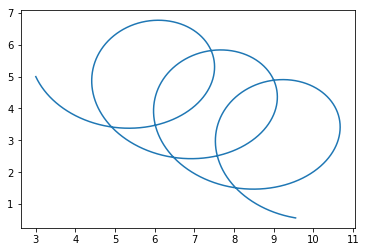

In [47]:
%pylab inline

plot(xa,ya)